# Customer-Segmentation

In [8]:
#Importing libraries
import pandas as pd #for data manipulation
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for advance visualizations
from sklearn.cluster import KMeans #for clustering
from sklearn.preprocessing import StandardScaler #for scaling data

-> pandas and numpy for handiling data andnummerical arrays
-> matlpotlib and seaborn for charts and plots
-> sklearn provides machine learning tools like KMeans and data scaling

In [9]:
#Load the dataset
data = pd.read_csv("../data/Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


-> Loads CSV into a Dataframe
-> Displays the first few rows to undersand the format

In [10]:
#Basic Exploration
print(data.info()) #data-types and non-null counts
print(data.describe()) #Sumary Statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

-> Shows coulumn types, missing values and statistics

In [11]:
#Select features for clustering
X = data[["Annual Income (k$)", "Spending Score (1-100)"]] # Choose two relevant features

-> Uses just two features for easier visualization and better interpretation

In [12]:
#Scale the features
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

->Standardizes data to have 0 mean and unit variance
->Important so that clustering isn’t biased by scale

In [13]:
#Find optimal number of clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS

->Tries different cluster counts (1–10) and stores the WCSS

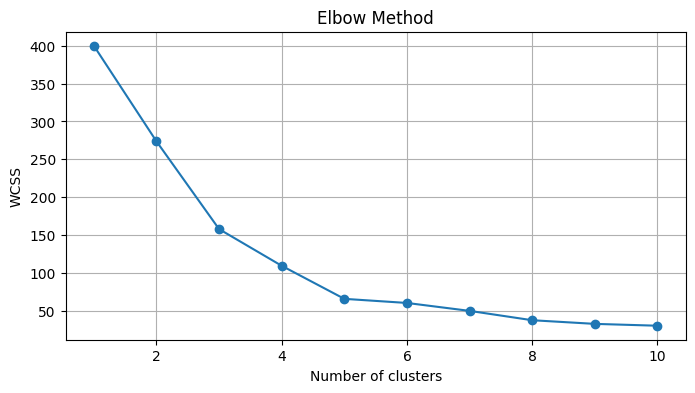

In [14]:
#Plot the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

->Plots elbow curve to help pick the ideal number of clusters

In [15]:
#Apply KMeans with chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)  # Predict cluster labels

->Applies clustering and assigns a cluster label to each point

In [16]:
#Add cluster labels to original data
data['Cluster'] = y_kmeans

->Adds a new column to original data for visualization and saving

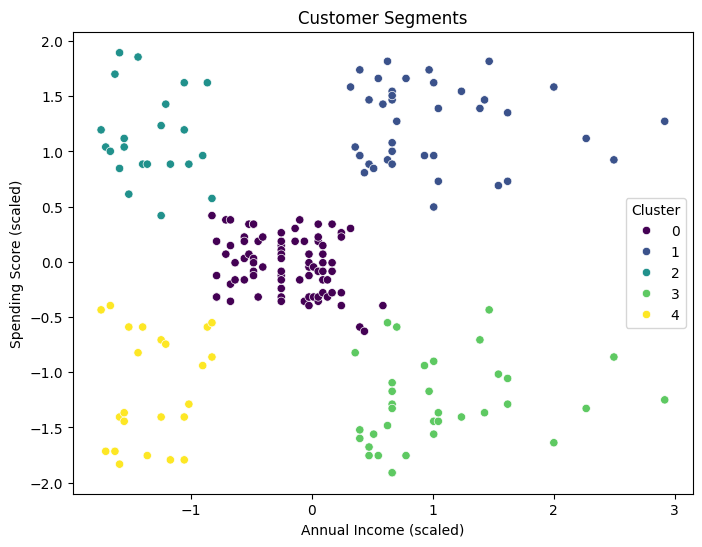

In [17]:
#Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()

->Shows customer segments as colored clusters in a scatter plot